##Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [41]:
!pip install tensorflow
!pip install keras


##Q2. Load the Wine Quality dataset and explore its dimensions.  Dataset link:


https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [42]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.12.0
Keras version: 2.12.0


In [43]:
import pandas as pd

# Load the dataset
dataset_path = "/content/wine.csv"
df = pd.read_csv(dataset_path)

# Explore the dimensions of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 1599
Number of columns: 12


##Q3. Check for null values, identify categorical variables, and encode them.

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
dataset_path = "/content/wine.csv"
df = pd.read_csv(dataset_path)

# Check for null values
print("Null values:")
print(df.isnull().sum())

# Identify categorical variables
categorical_vars = ['quality']

# Encode categorical variables
label_encoder = LabelEncoder()
for var in categorical_vars:
    df[var] = label_encoder.fit_transform(df[var])

# Print the encoded dataset
print("\nEncoded dataset:")
print(df.head())


Null values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Encoded dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0     

##Q4. Separate the features and target variables from the dataframe.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate the features and target variables
X = df.drop('quality', axis=1)
y = df['quality']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform train-test split on the encoded data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)


##Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = "/content/wine.csv"
df = pd.read_csv(dataset_path)

# Separate the features and target variables
features = df.drop('quality', axis=1)
target = df['quality']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (1023, 11) (1023,)
Validation set shape: (256, 11) (256,)
Test set shape: (320, 11) (320,)


##Q6. Perform scaling on the dataset.

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset_path = "/content/wine.csv"
df = pd.read_csv(dataset_path)

# Separate the features and target variables
features = df.drop('quality', axis=1)
target = df['quality']

# Perform scaling on the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Print the first few rows of the scaled dataset
print(df_scaled.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  


##Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [48]:
import pandas as pd

# Load the dataset
dataset_path = "/content/wine.csv"
df = pd.read_csv(dataset_path)

# Determine the number of features
n_features = df.shape[1] - 1  # Subtract 1 to exclude the target variable

print("Number of features:", n_features)


Number of features: 11


In [49]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


##Q8. Create a Sequential model and add all the layers to it.

In [50]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 64)                768       
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 dense_71 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


##Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the TensorBoard callback
log_dir = "logs/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with the TensorBoard callback
model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=100, batch_size=32, callbacks=[tensorboard_callback])


Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 1.1138 - accuracy: 0.5308 - val_loss: 0.7371 - val_accuracy: 0.5039
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6753 - accuracy: 0.6080 - val_loss: 0.6363 - val_accuracy: 0.6523
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6654 - accuracy: 0.6051 - val_loss: 0.6230 - val_accuracy: 0.6484
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6476 - accuracy: 0.6090 - val_loss: 0.6170 - val_accuracy: 0.6562
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6516 - accuracy: 0.6227 - val_loss: 0.6500 - val_accuracy: 0.6289
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6372 - accuracy: 0.6334 - val_loss: 0.6170 - val_accuracy: 0.6328
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6314 - accuracy: 0.6432 - val_loss: 0.6433 - val_accuracy: 0.6211
Epoch 8/100

##Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with EarlyStopping callback
history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=20, batch_size=32, callbacks=[early_stopping_callback])


Epoch 1/20
32/32 [==============================] - 3s 32ms/step - loss: 0.8063 - accuracy: 0.5865 - val_loss: 0.6550 - val_accuracy: 0.6328
Epoch 2/20
32/32 [==============================] - 0s 14ms/step - loss: 0.6684 - accuracy: 0.6061 - val_loss: 0.6385 - val_accuracy: 0.6328
Epoch 3/20
32/32 [==============================] - 0s 13ms/step - loss: 0.6532 - accuracy: 0.6295 - val_loss: 0.6800 - val_accuracy: 0.5859
Epoch 4/20
32/32 [==============================] - 0s 14ms/step - loss: 0.6436 - accuracy: 0.6246 - val_loss: 0.6418 - val_accuracy: 0.6289
Epoch 5/20
32/32 [==============================] - 0s 15ms/step - loss: 0.6416 - accuracy: 0.6285 - val_loss: 0.6198 - val_accuracy: 0.6406
Epoch 6/20
32/32 [==============================] - 0s 9ms/step - loss: 0.6298 - accuracy: 0.6393 - val_loss: 0.6671 - val_accuracy: 0.5742
Epoch 7/20
32/32 [==============================] - 1s 16ms/step - loss: 0.6290 - accuracy: 0.6354 - val_loss: 0.6337 - val_accuracy: 0.6250
Epoch 8/20
32/

##Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with ModelCheckpoint callback
history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=100, batch_size=32, callbacks=[checkpoint_callback])


Epoch 1/100
32/32 [==============================] - 2s 20ms/step - loss: 0.8653 - accuracy: 0.5455 - val_loss: 0.6360 - val_accuracy: 0.6250
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6573 - accuracy: 0.6344 - val_loss: 0.6321 - val_accuracy: 0.6250
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6520 - accuracy: 0.6188 - val_loss: 0.6179 - val_accuracy: 0.6484
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6577 - accuracy: 0.6168 - val_loss: 0.6399 - val_accuracy: 0.6055
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6527 - accuracy: 0.6285 - val_loss: 0.6634 - val_accuracy: 0.5703
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.6393 - val_loss: 0.6167 - val_accuracy: 0.6445
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6186 - accuracy: 0.6510 - val_loss: 0.6142 - val_accuracy: 0.6328
Epoch 8/100

##Q12. Print the model summary.

In [54]:
model.summary()


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 64)                768       
                                                                 
 dense_79 (Dense)            (None, 32)                2080      
                                                                 
 dense_80 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


##Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

##Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [55]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


##Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the callbacks
log_dir = "logs/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

checkpoint_callback = ModelCheckpoint(filepath='best_model2.h5', monitor='val_loss', save_best_only=True)

# Fit the model with callbacks
model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=100, batch_size=32,
          callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])


Epoch 1/100
32/32 [==============================] - 2s 17ms/step - loss: 1.0064 - accuracy: 0.5591 - val_loss: 0.8749 - val_accuracy: 0.5469
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 0.7022 - accuracy: 0.5982 - val_loss: 0.6636 - val_accuracy: 0.5625
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.6188 - val_loss: 0.6394 - val_accuracy: 0.6289
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6391 - accuracy: 0.6266 - val_loss: 0.6215 - val_accuracy: 0.6445
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6341 - accuracy: 0.6364 - val_loss: 0.6399 - val_accuracy: 0.6250
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6239 - accuracy: 0.6432 - val_loss: 0.6604 - val_accuracy: 0.6055
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6201 - accuracy: 0.6549 - val_loss: 0.6144 - val_accuracy: 0.6406
Epoch 8/100


##Q16. Get the model's parameters.

In [57]:
# Get the model's parameters
model_params = model.get_weights()

In [58]:
model_params

[array([[ 1.23531736e-01,  2.31270939e-01, -2.34368518e-01,
         -2.06480727e-01, -2.30384499e-01,  5.66638149e-02,
          2.19800770e-02,  1.87131435e-01, -1.45330891e-01,
          1.52573258e-01,  1.79397762e-02, -2.23850206e-01,
         -4.99123186e-02,  7.86530674e-02,  3.98812182e-02,
         -6.78212792e-02, -8.06668401e-02,  7.17151212e-03,
         -1.56701252e-01, -2.43320718e-01, -9.67624784e-03,
          1.15310721e-01, -2.55070746e-01,  2.26294458e-01,
         -7.07997829e-02,  3.99520583e-02, -2.49682933e-01,
          1.90016508e-01,  1.99601620e-01, -1.49415269e-01,
         -2.01625720e-01,  1.77530330e-02, -2.38441393e-01,
         -3.42252627e-02, -8.46161097e-02, -1.18316643e-01,
         -1.06918514e-01,  7.83806518e-02,  1.84691891e-01,
         -3.46357189e-03,  2.41771877e-01, -2.39553079e-02,
         -2.01194644e-01,  6.31547570e-02, -9.60135609e-02,
         -1.85257941e-02,  9.18129385e-02,  2.03788295e-01,
          2.07983255e-01, -1.33993790e-0

##Q17. Store the model's training history as a Pandas DataFrame.

In [59]:
history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=10, batch_size=32)

# Convert the training history to a Pandas DataFrame
history_df = pd.DataFrame(history.history)

Epoch 1/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5937 - accuracy: 0.6735 - val_loss: 0.5737 - val_accuracy: 0.6875
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5798 - accuracy: 0.6794 - val_loss: 0.5766 - val_accuracy: 0.7109
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.6989 - val_loss: 0.5984 - val_accuracy: 0.6367
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.6647 - val_loss: 0.6100 - val_accuracy: 0.6211
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.7019 - val_loss: 0.5892 - val_accuracy: 0.6992
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.6706 - val_loss: 0.6306 - val_accuracy: 0.6055
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5691 - accuracy: 0.6999 - val_loss: 0.5713 - val_accuracy: 0.7070
Epoch 8/10
32/32 [==

##Q18. Plot the model's training history.


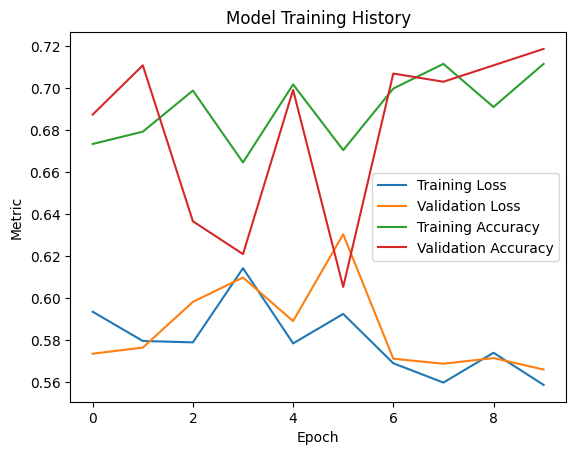

In [60]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()


##Q19. Evaluate the model's performance using the test data.

In [61]:
import tensorflow as tf
from tensorflow import keras

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=100, batch_size=32)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.5756 - accuracy: 0.6804 - val_loss: 0.5677 - val_accuracy: 0.6914
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.6882 - val_loss: 0.5549 - val_accuracy: 0.7266
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.7038 - val_loss: 0.5533 - val_accuracy: 0.7070
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.7204 - val_loss: 0.6041 - val_accuracy: 0.6836
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.7126 - val_loss: 0.5577 - val_accuracy: 0.6992
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7283 - val_loss: 0.5608 - val_accuracy: 0.7188
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.7312 - val_loss: 0.5551 - val_accuracy: 0.7227
Epoch 8/100
3

In [62]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Define the list of optimizer and loss function configurations to try
optimizers = ['adam', 'sgd', 'rmsprop']
losses = ['binary_crossentropy', 'mse', 'mae']

best_accuracy = 0
best_optimizer = None
best_loss = None

for optimizer in optimizers:
    for loss in losses:
        print(f"Optimizer: {optimizer}, Loss: {loss}")

        # Compile the model
        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

        # Train the model
        model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=10, batch_size=32)

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)

        print('Test Loss:', test_loss)
        print('Test Accuracy:', test_accuracy)
        print('\n')

        # Check if this configuration has better accuracy
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_optimizer = optimizer
            best_loss = loss

print('Best Configuration:')
print(f"Optimizer: {best_optimizer}, Loss: {best_loss}")
print(f"Best Test Accuracy: {best_accuracy}")


Optimizer: adam, Loss: binary_crossentropy
Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 1.1952 - accuracy: 0.5572 - val_loss: 0.6742 - val_accuracy: 0.6133
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.6227 - val_loss: 0.6683 - val_accuracy: 0.5977
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.6119 - val_loss: 0.6403 - val_accuracy: 0.6367
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6158 - val_loss: 0.6420 - val_accuracy: 0.6094
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.6139 - val_loss: 0.6350 - val_accuracy: 0.6289
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.6276 - val_loss: 0.6309 - val_accuracy: 0.6211
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6305 - val_loss: 0.6361 

##After applying Best Configuration:
##Optimizer: rmsprop, Loss: mae

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='mae', metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=10, batch_size=32)

# Convert the training history to a Pandas DataFrame
history_df = pd.DataFrame(history.history)



Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 0.4220 - accuracy: 0.5797 - val_loss: 0.3817 - val_accuracy: 0.6328
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3798 - accuracy: 0.6197 - val_loss: 0.3815 - val_accuracy: 0.6250
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3817 - accuracy: 0.6237 - val_loss: 0.3883 - val_accuracy: 0.6172
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.6246 - val_loss: 0.3778 - val_accuracy: 0.6289
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.6061 - val_loss: 0.3652 - val_accuracy: 0.6328
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3779 - accuracy: 0.6217 - val_loss: 0.3671 - val_accuracy: 0.6445
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3791 - accuracy: 0.6217 - val_loss: 0.3808 - val_accuracy: 0.6211
Epoch 8/10
32/32 [==

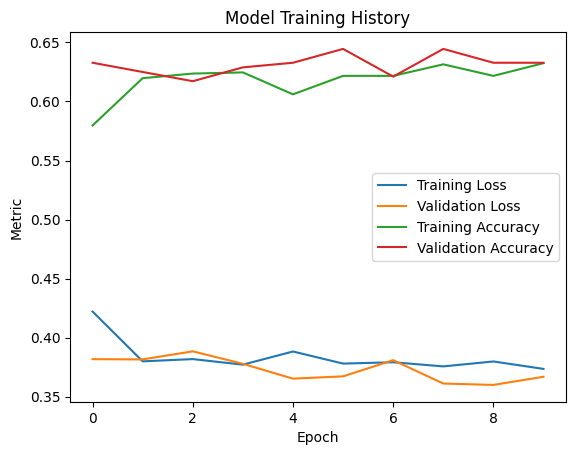

In [68]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()


you can see the difference

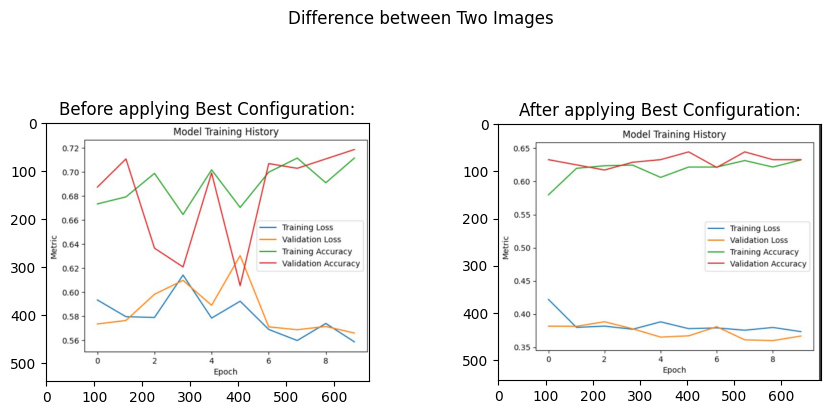

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the images
image1 = plt.imread('/content/mt.jpg')
image2 = plt.imread('/content/mt2.jpg')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(image1)
axes[0].set_title('Before applying Best Configuration:')

# Display the second image
axes[1].imshow(image2)
axes[1].set_title('After applying Best Configuration:')

# Set a title for the figure
fig.suptitle('Difference between Two Images')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the figure
plt.show()


##Storing this model with filename op_model.h5

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
# Compile the model
model.compile(optimizer='rmsprop', loss='mae', metrics=['accuracy'])

# Define the callbacks
log_dir = "logs/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

checkpoint_callback = ModelCheckpoint(filepath='op_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model with callbacks
model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=100, batch_size=32,
          callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])


Epoch 1/100
32/32 [==============================] - 2s 10ms/step - loss: 0.4585 - accuracy: 0.5425 - val_loss: 0.5275 - val_accuracy: 0.4727
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4576 - accuracy: 0.5425 - val_loss: 0.5274 - val_accuracy: 0.4727
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.5425 - val_loss: 0.5274 - val_accuracy: 0.4727
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4575 - accuracy: 0.5425 - val_loss: 0.5274 - val_accuracy: 0.4727
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.5425 - val_loss: 0.5274 - val_accuracy: 0.4727
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.5425 - val_loss: 0.5274 - val_accuracy: 0.4727
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.5425 - val_loss: 0.5274 - val_accuracy: 0.4727
Epoch 8/100
